<a href="https://colab.research.google.com/github/02smg/School/blob/main/%ED%95%99%EA%B5%90_%EC%95%88%EC%A0%84_%EC%82%AC%EA%B3%A0_%EC%A4%91%EC%95%99%ED%9A%8C_%EC%88%98%EC%A0%95_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [70]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
%matplotlib inline
!apt-get install -y fonts-nanum*
!rm -rf /root/.cache/matplotlib/* # 폰트 캐시 재설정
# 런타임 다시 시작 후 실행
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothic')

# 폰트 설정
!apt-get update -qq
!apt-get install fonts-nanum* -qq

# matplotlib에 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_manager.fontManager.addfont(font_path)
plt.rc('font', family='NanumGothic')



Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

In [72]:
import pandas as pd

# 업로드
df = pd.read_excel('★2019~2023 학교안전사고 데이터_수정.xlsx')
print(df.head())

   Unnamed: 0 < 데이터 설명 >   Unnamed: 2  \
0         NaN        컬렴명           설명   
1         NaN        학교급          학교급   
2         NaN       설립유형     학교 설립 유형   
3         NaN         지역   학교가 소속된 지역   
4         NaN        교육청  학교가 소속된 교육청   

                                          Unnamed: 3 Unnamed: 4  
0                                          항목(가나다 순)         비고  
1  고등학교, 기타학교*, 유치원, 중학교, 초등학교, 특수학교\n* 기타학교 : (고...        NaN  
2                                         공립, 국립, 사립        NaN  
3                                                 -         NaN  
4                                                 -         NaN  


# 데이터 설명

In [73]:
import pandas as pd

# 데이터 프레임 생성
data = {
    '컬렴명': ['학교급', '설립유형', '지역', '교육청', '사고자구분', '사고자성별', '사고자학년', '사고발생일', '사고발생요일', '사고발생시각', '사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동', '사고매개물'],
    '설명': ['학교급', '학교 설립 유형', '학교가 소속된 지역', '학교가 소속된 교육청', '사고자 구분', '사고자 성별', '사고자 학년', '사고가 발생한 날짜', '사고가 발생한 요일', '사고가 발생한 시각',
             '학교안전사고보상지원시스템을 통한 학교안전사고 접수 시 선택한 유형별 사고 내용\n※(참고) 사고유형별 항목\n - 2023.1.1.자로 학교안전사고 통계 분류체계 개편으로 일부 분류항목이 변경되어 중복/유사 항목이 있을 수 있음',
             '-', '-', '-', '-', '-'],
    '항목(가나다 순)': [
        "고등학교, 기타학교*, 유치원, 중학교, 초등학교, 특수학교\n* 기타학교 : (고등)공민학고, 고등기술학교, 각종학교, 방송통신중고등학교, 평생교육시설, 외국인학교",
        '공립, 국립, 사립',
        '-',
        '-',
        '교육활동참여자, 교직원(계약직), 교직원(교원), 교직원(일반직), 기타(일반인 등), 일반학생, 체육특기학생, 특수학교(학급)학생, N/A',
        '남, 여',
        '1학년, 2학년, 3학년, 4학년, 5학년, 6학년, 유아, N/A',
        '-\n해당연도 사고 접수일 기준 데이터이므로\n사고 발생연도는 해당연도 외 다른 연도 데이터도 포함',
        '-',
        '-',
        '기숙사생활, 기타, 등하교, 석식시간, 수업시간, 쉬는시간, 식사시간, 점심시간, 체육활동(체육수업), 특별활동, 학교행사, 휴식시간 및 청소시간',
        '교실, 교외(교외활동), 부속시설, 운동장, 통로',
        '기타, 다리, 머리(두부), 발, 복합부위, 손, 치아(구강), 팔, 흉복부\n복합부위는 2개 이상의 부위가 선택된 경우 복합부위로 변경',
        '기타, 낙상, 낙상-넘어짐, 낙상-떨어짐, 낙상-미끄러짐, 물리적힘 노출, 사람과의 충돌, 염좌·삐임 등 신체 충격',
        '가구(책상/의자/책장/탁자/침대 등), 건물(문/창문/바닥/벽 등), 기계 도구류(기계선반, 재봉틀기계 등), 기타, 날카로운 물건(칼/가위/송곳 등), 열(불/뜨거운 물 등), 운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등), 운송용구(차/자전거/선박/항공기 등), 자연(사람/동물/식물 등)',
        '공부, 구기운동, 기타, 기타운동, 보행/주행, 식사/수면/휴식, 실험실습, 장난/놀이'
    ],
    '비고': [
        '',
        '',
        '',
        '',
        '',
        '',
        '',
        '해당연도 사고 접수일 기준 데이터이므로\n사고 발생연도는 해당연도 외 다른 연도 데이터도 포함',
        '',
        '',
        '',
        '',
        '복합부위는 2개 이상의 부위가 선택된 경우 복합부위로 변경',
        '',
        '※ 학교안전사고보상지원시스템 : 학교안전공제중앙회에서 운영하는 사고접수 및 보상청구 시스템(https://www.schoolsafe.or.kr)',
        ''
    ]
}

df = pd.DataFrame(data)
print(df)


       컬렴명                                                 설명  \
0      학교급                                                학교급   
1     설립유형                                           학교 설립 유형   
2       지역                                         학교가 소속된 지역   
3      교육청                                        학교가 소속된 교육청   
4    사고자구분                                             사고자 구분   
5    사고자성별                                             사고자 성별   
6    사고자학년                                             사고자 학년   
7    사고발생일                                         사고가 발생한 날짜   
8   사고발생요일                                         사고가 발생한 요일   
9   사고발생시각                                         사고가 발생한 시각   
10    사고시간  학교안전사고보상지원시스템을 통한 학교안전사고 접수 시 선택한 유형별 사고 내용\n※...   
11    사고장소                                                  -   
12    사고부위                                                  -   
13    사고형태                                                  -   
14  사고당시활동               

# '(참고) 사고유형별 항목'

In [74]:
import pandas as pd

# 엑셀 파일의 특정 시트 불러오기
file_path = '/content/★2019~2023 학교안전사고 데이터_수정.xlsx'
sheet_name = '(참고) 사고유형별 항목'

# 해당 시트만 데이터 프레임으로 불러오기
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 프레임 출력
print(df.head())


           사고시간     Unnamed: 1  Unnamed: 2 사고장소 Unnamed: 4  Unnamed: 5  \
0  체육활동\n(체육수업)             체육         NaN  운동장        운동장         NaN   
1           NaN       신체활동, 게임         NaN  NaN        놀이터         NaN   
2           NaN  실외활동(바깥놀이 포함)         NaN  NaN       체육시설         NaN   
3           NaN           체육시간         NaN  NaN       놀이시설         NaN   
4           NaN           체육수업         NaN  NaN      교문/담장         NaN   

      사고형태     Unnamed: 7  Unnamed: 8 사고부위 Unnamed: 10  Unnamed: 11 사고당시활동  \
0  물리적힘 노출  움직이는 물체와의 부딪힘         NaN    발          발목          NaN     공부   
1      NaN   고정된 물체와의 부딪힘         NaN  NaN           발          NaN    NaN   
2      NaN         긁힘, 찔림         NaN  NaN         발가락          NaN    NaN   
3      NaN         베임, 절단         NaN    손          손목          NaN   실험실습   
4      NaN   물체 사이에 끼임·눌림         NaN  NaN           손          NaN    NaN   

  Unnamed: 13  Unnamed: 14                  사고매개물  
0          수업          NaN   가구(책상

In [75]:
import pandas as pd

data = {
    '사고시간': ["체육활동 (체육수업)", "점심시간", "수업시간", "쉬는시간", "학교행사", "등하교", "석식시간", "기숙사생활", "기타"],
    '사고장소': ["체육", "식사시간(간식 포함)", "이론수업", "쉬는시간", "체육대회", "등교", "석식시간", "기숙사생활", "기타"],
    '사고형태': ["운동장", "점심시간", "배수구(맨홀)", "구령대(스탠드)", "음악실", "교통구역(스쿨존 내)-차도", "교통구역(스쿨존 외)-차도", "교통구역(스쿨존 외)-기타 교통구역", "가정"],
    '사고부위': ["물리적힘 노출", "찔림/베임", "으깨짐/뭉개짐/끼임", "접촉", "떨어짐-아스팔트", "동물에게 물림(사람 포함)", "감전", "추위에 장시간 노출", "화상"],
    '사고당시활동': ["움직이는 물체와의 부딪힘", "찔림/베임", "사람 사이에 끼임·눌림", "접촉", "떨어짐-아스팔트", "곤충·식물 등에 쏘임", "화학물질 접촉·흡입·섭취", "추위에 장시간 노출", "자연재해(동상/일광/벼락/지진/홍수 등)"],
    '사고매개물': ["발", "이마", "눈", "머리(두부)", "치아(구강)", "곤충·식물 등에 쏘임", "저온의 물체(드라이아이스 등)·물질 접촉", "추위에 장시간 노출", "자연재해(동상/일광/벼락/지진/홍수 등)"]
}

# 최장 길이 계산
max_len = max(map(len, data.values()))

# 각 열의 길이를 동일하게 맞추기 위해 None으로 채우기
for key in data:
    data[key] += [None] * (max_len - len(data[key]))

df = pd.DataFrame(data)

print(df)



          사고시간         사고장소                 사고형태            사고부위  \
0  체육활동 (체육수업)           체육                  운동장         물리적힘 노출   
1         점심시간  식사시간(간식 포함)                 점심시간           찔림/베임   
2         수업시간         이론수업              배수구(맨홀)      으깨짐/뭉개짐/끼임   
3         쉬는시간         쉬는시간             구령대(스탠드)              접촉   
4         학교행사         체육대회                  음악실        떨어짐-아스팔트   
5          등하교           등교       교통구역(스쿨존 내)-차도  동물에게 물림(사람 포함)   
6         석식시간         석식시간       교통구역(스쿨존 외)-차도              감전   
7        기숙사생활        기숙사생활  교통구역(스쿨존 외)-기타 교통구역      추위에 장시간 노출   
8           기타           기타                   가정              화상   

                   사고당시활동                   사고매개물  
0           움직이는 물체와의 부딪힘                       발  
1                   찔림/베임                      이마  
2            사람 사이에 끼임·눌림                       눈  
3                      접촉                  머리(두부)  
4                떨어짐-아스팔트                  치아(구강)  
5      

#2019

In [76]:
import pandas as pd

# 엑셀 파일의 특정 시트 불러오기
file_path = '/content/★2019~2023 학교안전사고 데이터_수정.xlsx'
sheet_name = '2019'

# 해당 시트만 데이터 프레임으로 불러오기
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 프레임 출력
print(df.head())

         구분   학교급  지역         교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일 사고발생요일  \
0  A0000001  기타학교  경기      경기도교육청   사립  일반학생     여   2학년  2018-12-28      금   
1  A0000002  초등학교  경기   광주하남교육지원청   공립  일반학생     여   2학년  2018-12-27      목   
2  A0000003  초등학교  경기     용인교육지원청   공립  일반학생     남   6학년  2018-12-28      금   
3  A0000004   중학교  경기  구리남양주교육지원청   공립  일반학생     남   1학년  2018-11-22      목   
4  A0000005   중학교  경기   광주하남교육지원청   공립  일반학생     여   3학년  2018-12-24      월   

  사고발생시각         사고시간  사고장소    사고부위     사고형태 사고당시활동  \
0  13:10         수업시간    교실       손  물리적힘 노출   실험실습   
1  11:35  휴식시간 및 청소시간    통로      다리  낙상-미끄러짐  보행/주행   
2  12:40         점심시간    교실  머리(두부)  물리적힘 노출  보행/주행   
3  13:45         체육수업   운동장       손  물리적힘 노출   구기운동   
4  14:00         학교행사  교외활동      다리  낙상-미끄러짐  보행/주행   

                            사고매개물  
0              날카로운 물건(칼/가위/송곳 등)  
1                 건물(문/창문/바닥/벽 등)  
2                 건물(문/창문/바닥/벽 등)  
3  운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)  
4             

#2020

In [77]:
import pandas as pd

# 엑셀 파일의 특정 시트 불러오기
file_path = '/content/★2019~2023 학교안전사고 데이터_수정.xlsx'
sheet_name = '2020'

# 해당 시트만 데이터 프레임으로 불러오기
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 프레임 출력
print(df.head())

         구분   학교급  지역        교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일 사고발생요일  \
0  B0000001  초등학교  경기    용인교육지원청   공립  일반학생     남   5학년  2019-06-27      목   
1  B0000002   중학교  경기  광주하남교육지원청   공립  일반학생     남   2학년  2019-10-04      금   
2  B0000003  고등학교  경기    성남교육지원청   사립  일반학생     남   1학년  2019-09-06      금   
3  B0000004  초등학교  경기  광주하남교육지원청   공립  일반학생     남   3학년  2019-12-05      목   
4  B0000005  고등학교  경기    성남교육지원청   사립  일반학생     여   1학년  2019-12-05      목   

  사고발생시각  사고시간  사고장소    사고부위     사고형태    사고당시활동  \
0  13:30  점심시간   운동장       발  낙상-미끄러짐      구기운동   
1  15:40  학교행사   운동장       팔  사람과의 충돌      구기운동   
2  12:10  점심시간  부속시설      기타  물리적힘 노출  식사/수면/휴식   
3  08:30   등하교  교외활동  치아(구강)   낙상-넘어짐     장난/놀이   
4  16:40   등하교    통로       발   낙상-넘어짐     보행/주행   

                            사고매개물  
0  운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)  
1                  자연(사람/동물/식물 등)  
2                              기타  
3                              기타  
4                 건물(문/창문/바닥/벽 등)  


#2021

In [79]:
import pandas as pd

# 엑셀 파일의 특정 시트 불러오기
file_path = '/content/★2019~2023 학교안전사고 데이터_수정.xlsx'
sheet_name = '2021'

# 해당 시트만 데이터 프레임으로 불러오기
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 프레임 출력
print(df.head())

         구분   학교급  지역        교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일 사고발생요일  \
0  C0000001  초등학교  경기    성남교육지원청   공립  일반학생     남   6학년  2020-11-20      금   
1  C0000002   유치원  경기    성남교육지원청   공립  일반학생     남    유아  2020-12-02      수   
2  C0000003  고등학교  경기    성남교육지원청   사립  일반학생     남   1학년  2020-11-20      금   
3  C0000004  초등학교  경기    양평교육지원청   공립  일반학생     남   6학년  2020-12-28      월   
4  C0000005   중학교  제주  서귀포시교육지원청   공립  일반학생     남   2학년  2020-11-18      수   

  사고발생시각  사고시간  사고장소    사고부위     사고형태 사고당시활동                           사고매개물  
0  09:20  체육수업  부속시설       발  낙상-미끄러짐   구기운동  운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)  
1  16:20  수업시간    교실  머리(두부)  낙상-미끄러짐     기타                              기타  
2  10:30  수업시간    교실       손  물리적힘 노출   실험실습              날카로운 물건(칼/가위/송곳 등)  
3  12:30  점심시간  부속시설       손   낙상-넘어짐  장난/놀이                  자연(사람/동물/식물 등)  
4  11:15  체육수업  부속시설      다리   낙상-넘어짐     기타                              기타  


#2022

In [80]:
import pandas as pd

# 엑셀 파일의 특정 시트 불러오기
file_path = '/content/★2019~2023 학교안전사고 데이터_수정.xlsx'
sheet_name = '2022'

# 해당 시트만 데이터 프레임으로 불러오기
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 프레임 출력
print(df.head())

         구분   학교급  지역        교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일 사고발생요일  \
0  D0000001  초등학교  경기    수원교육지원청   공립  일반학생     남   6학년  2021-12-13      월   
1  D0000002  고등학교  경기  화성오산교육지원청   공립  일반학생     남   2학년  2021-12-29      수   
2  D0000003  초등학교  경기    수원교육지원청   공립  일반학생     여   1학년  2021-12-27      월   
3  D0000004   중학교  전북    전주교육지원청   공립  일반학생     여   3학년  2021-11-08      월   
4  D0000005  초등학교  경북    구미교육지원청   공립  일반학생     여   5학년  2021-09-02      목   

  사고발생시각  사고시간  사고장소  사고부위    사고형태 사고당시활동                           사고매개물  
0  09:20  체육수업  부속시설    다리  낙상-넘어짐   기타운동                 건물(문/창문/바닥/벽 등)  
1  10:10  체육수업  부속시설     손  낙상-넘어짐   구기운동                 건물(문/창문/바닥/벽 등)  
2  12:10  점심시간    통로  복합부위  낙상-넘어짐  보행/주행                 건물(문/창문/바닥/벽 등)  
3  11:00  체육수업  부속시설     발  낙상-떨어짐     기타  운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)  
4  11:50  체육수업  부속시설  복합부위  낙상-넘어짐   구기운동                 건물(문/창문/바닥/벽 등)  


#2023

In [81]:
import pandas as pd

# 엑셀 파일의 특정 시트 불러오기
file_path = '/content/★2019~2023 학교안전사고 데이터_수정.xlsx'
sheet_name = '2023'

# 해당 시트만 데이터 프레임으로 불러오기
df = pd.read_excel(file_path, sheet_name=sheet_name)

# 데이터 프레임 출력
print(df.head())

         구분   학교급  지역       교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일 사고발생요일  \
0  E0000001  초등학교  제주  제주시교육지원청   공립  일반학생     남   6학년  2022-10-28      금   
1  E0000002  초등학교  제주  제주시교육지원청   공립  일반학생     남   1학년  2022-12-27      화   
2  E0000003  초등학교  제주  제주시교육지원청   공립  일반학생     여   4학년  2022-12-28      수   
3  E0000004  초등학교  제주  제주시교육지원청   공립  일반학생     여   5학년  2022-12-27      화   
4  E0000005  초등학교  제주  제주시교육지원청   공립  일반학생     여   4학년  2022-12-29      목   

  사고발생시각  사고시간  사고장소  사고부위     사고형태 사고당시활동                             매개물  
0  12:40  식사시간   운동장     손  물리적힘 노출   구기운동  운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)  
1  11:20  식사시간    통로  복합부위  물리적힘 노출  보행/주행                 건물(문/창문/바닥/벽 등)  
2  11:50  체육활동   운동장     손  물리적힘 노출   구기운동  운동(놀이)용 장비/기구(공/운동기구/운동장 기구 등)  
3  13:20  체육활동  부속시설     발       낙상   기타운동                              기타  
4  10:00  수업시간    교실     손       낙상   실험실습                    열(불/뜨거운 물 등)  


In [82]:
pip install pandas matplotlib seaborn

# 연도별, 월별 , 시간별 안전사고 추이 및 경향 분석

In [83]:
import pandas as pd

# 엑셀 파일의 경로와 시트 이름 리스트
file_path = '/content/★2019~2023 학교안전사고 데이터_수정.xlsx'
sheet_names = ['2019', '2020', '2021', '2022', '2023']

# 각 시트를 데이터 프레임으로 불러와서 리스트에 저장
df_list = [pd.read_excel(file_path, sheet_name=sheet) for sheet in sheet_names]

# 데이터 프레임 병합
df = pd.concat(df_list)

# 데이터 프레임 출력
print(df.head())

         구분   학교급  지역         교육청 설립유형 사고자구분 사고자성별 사고자학년       사고발생일 사고발생요일  \
0  A0000001  기타학교  경기      경기도교육청   사립  일반학생     여   2학년  2018-12-28      금   
1  A0000002  초등학교  경기   광주하남교육지원청   공립  일반학생     여   2학년  2018-12-27      목   
2  A0000003  초등학교  경기     용인교육지원청   공립  일반학생     남   6학년  2018-12-28      금   
3  A0000004   중학교  경기  구리남양주교육지원청   공립  일반학생     남   1학년  2018-11-22      목   
4  A0000005   중학교  경기   광주하남교육지원청   공립  일반학생     여   3학년  2018-12-24      월   

  사고발생시각         사고시간  사고장소    사고부위     사고형태 사고당시활동  \
0  13:10         수업시간    교실       손  물리적힘 노출   실험실습   
1  11:35  휴식시간 및 청소시간    통로      다리  낙상-미끄러짐  보행/주행   
2  12:40         점심시간    교실  머리(두부)  물리적힘 노출  보행/주행   
3  13:45         체육수업   운동장       손  물리적힘 노출   구기운동   
4  14:00         학교행사  교외활동      다리  낙상-미끄러짐  보행/주행   

                            사고매개물  매개물  
0              날카로운 물건(칼/가위/송곳 등)  NaN  
1                 건물(문/창문/바닥/벽 등)  NaN  
2                 건물(문/창문/바닥/벽 등)  NaN  
3  운동(놀이)용 장비/기구(공/운동기구/운동장 기구

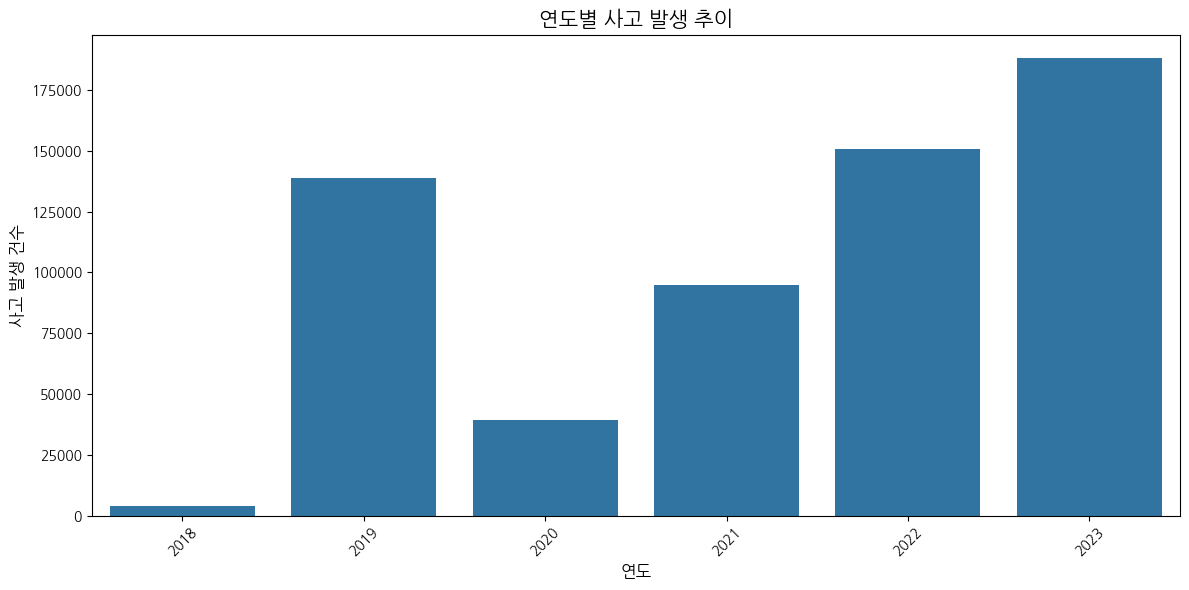

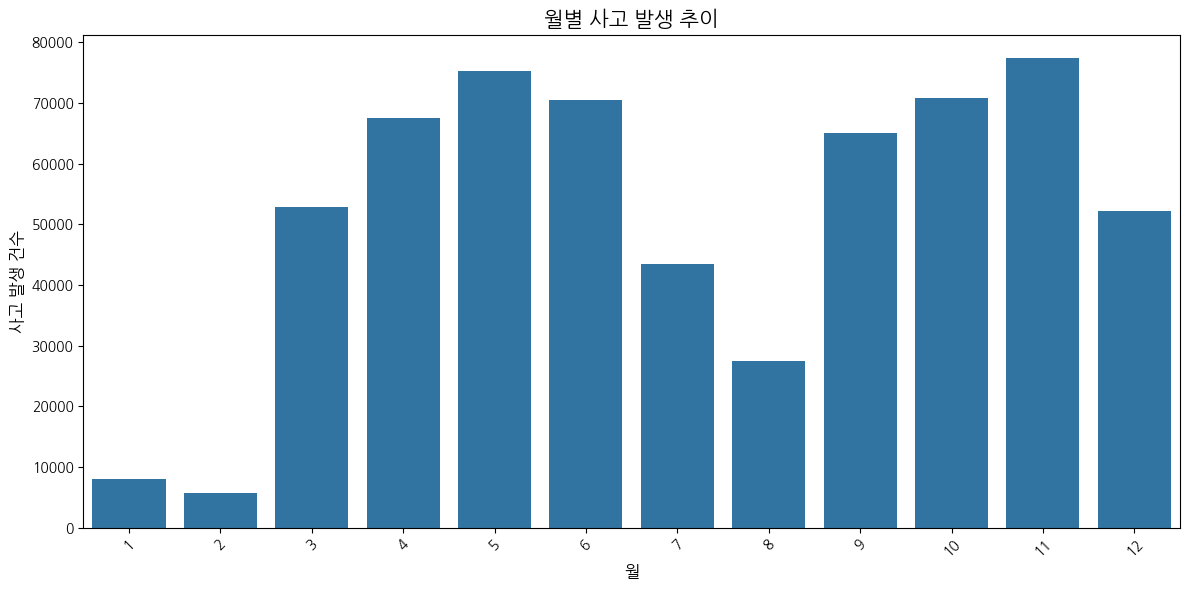

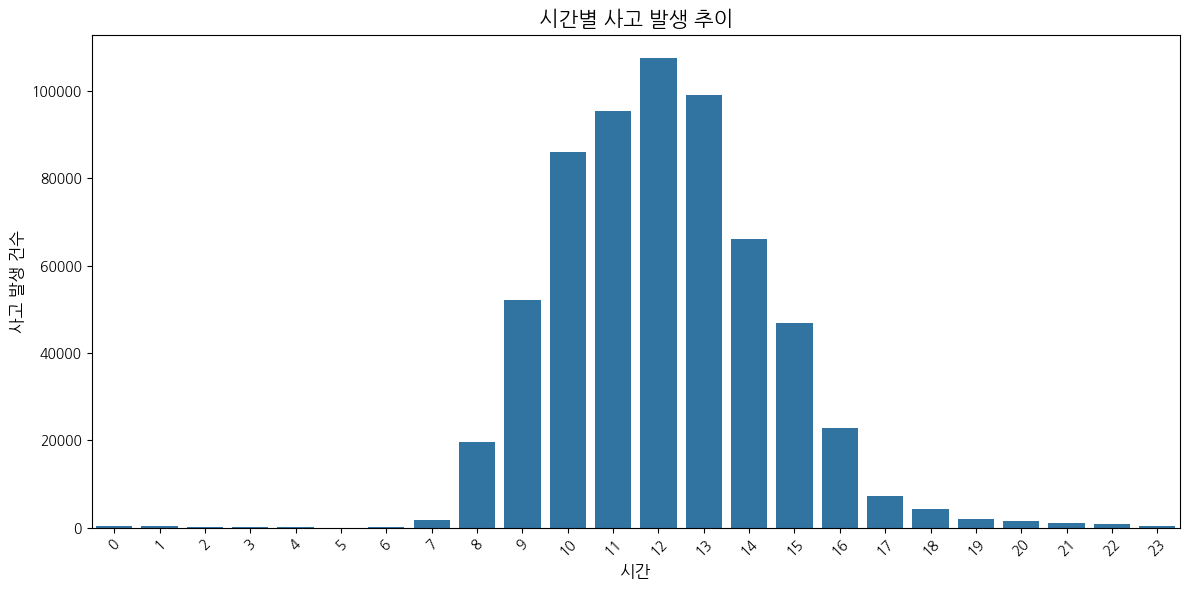

In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc

# 데이터 전처리
df['사고발생일'] = pd.to_datetime(df['사고발생일'])
df['연도'] = df['사고발생일'].dt.year
df['월'] = df['사고발생일'].dt.month

# 시각 데이터 변환
df['사고발생시각'] = df['사고발생시각'].astype(str)  # 시각을 문자열로 변환
df['시간'] = df['사고발생시각'].str.split(':').str[0].astype(int)  # 시간만 추출

# 연도별 사고 발생 추이
plt.rc('font', family='NanumGothic')  #
plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['연도'].between(2018, 2023)], x='연도')
plt.title('연도별 사고 발생 추이', fontsize=15)
plt.xlabel('연도', fontsize=12)
plt.ylabel('사고 발생 건수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 월별 사고 발생 추이
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='월')
plt.title('월별 사고 발생 추이', fontsize=15)
plt.xlabel('월', fontsize=12)
plt.ylabel('사고 발생 건수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 시간별 사고 발생 추이
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='시간')
plt.title('시간별 사고 발생 추이', fontsize=15)
plt.xlabel('시간', fontsize=12)
plt.ylabel('사고 발생 건수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 사고시간, 사고 장소, 매개물 에 따른 사고형태 분석

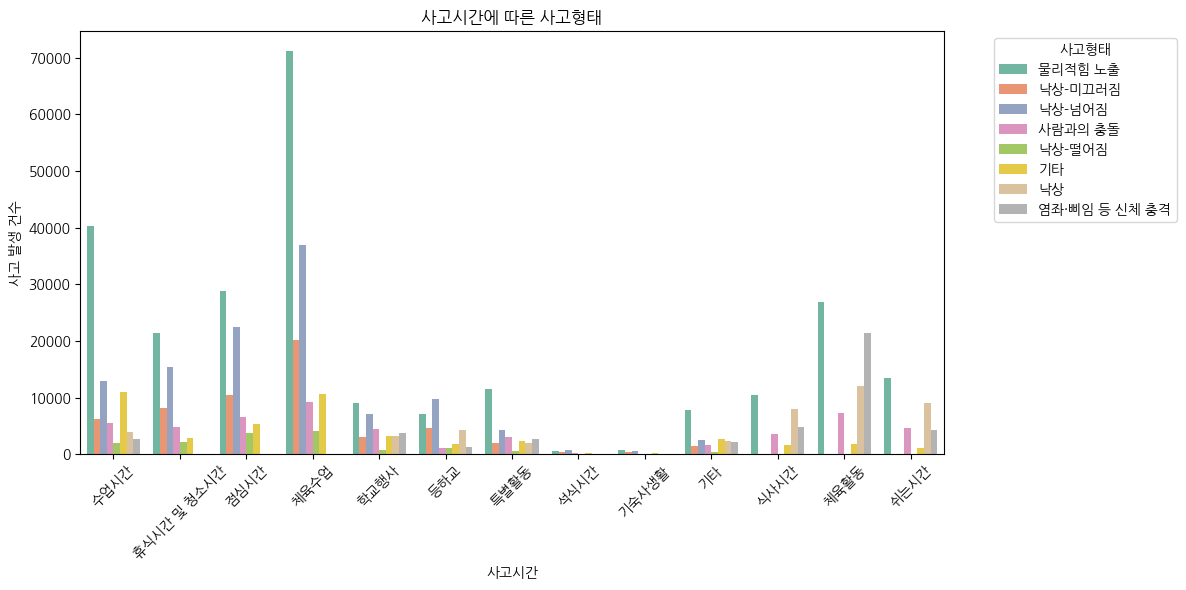

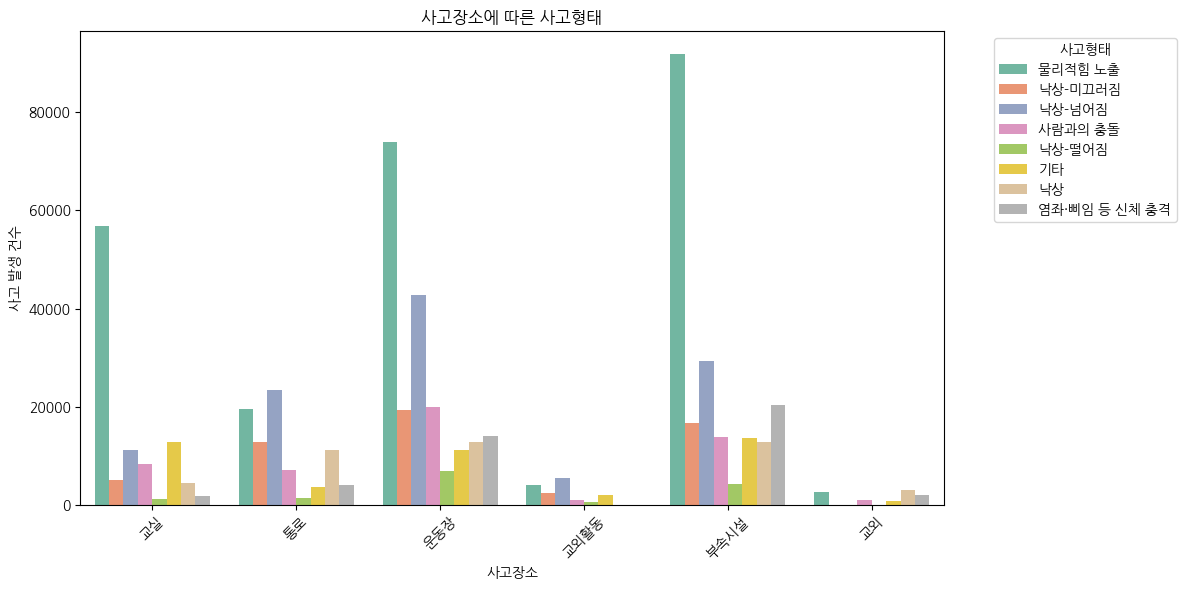

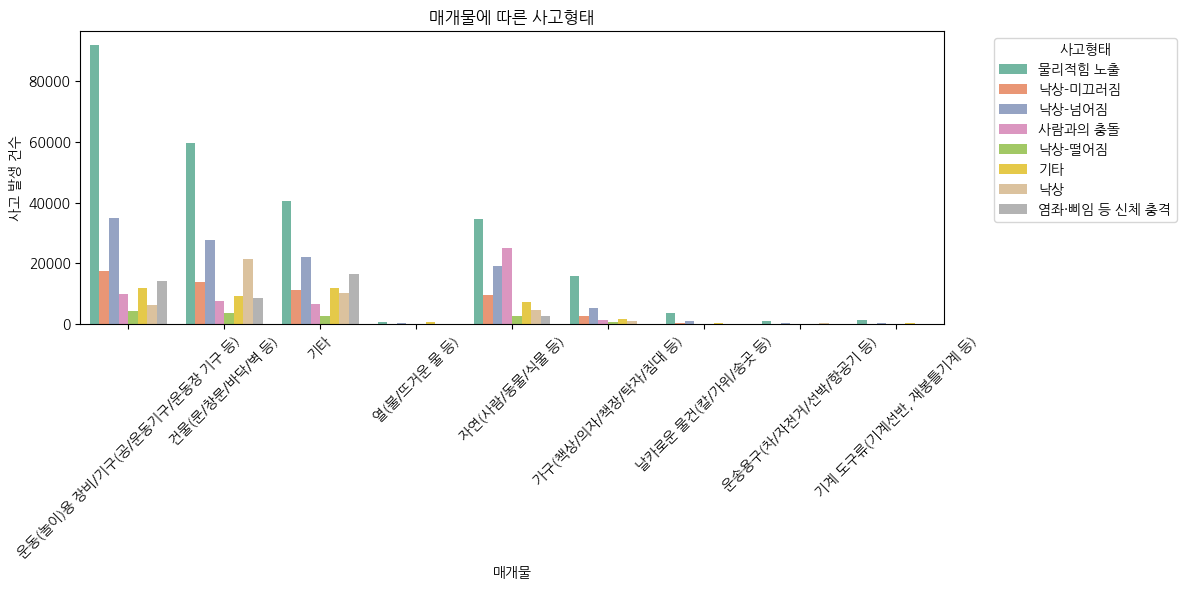

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 사고시간에 따른 사고형태 분석
plt.rc('font', family='NanumGothic')  #
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='사고시간', hue='사고형태', palette='Set2')
plt.title('사고시간에 따른 사고형태')
plt.xlabel('사고시간')
plt.ylabel('사고 발생 건수')
plt.legend(title='사고형태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 사고장소에 따른 사고형태 분석
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='사고장소', hue='사고형태', palette='Set2')
plt.title('사고장소에 따른 사고형태')
plt.xlabel('사고장소')
plt.ylabel('사고 발생 건수')
plt.legend(title='사고형태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 매개물에 따른 사고형태 분석
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='매개물', hue='사고형태', palette='Set2')
plt.title('매개물에 따른 사고형태')
plt.xlabel('매개물')
plt.ylabel('사고 발생 건수')
plt.legend(title='사고형태', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

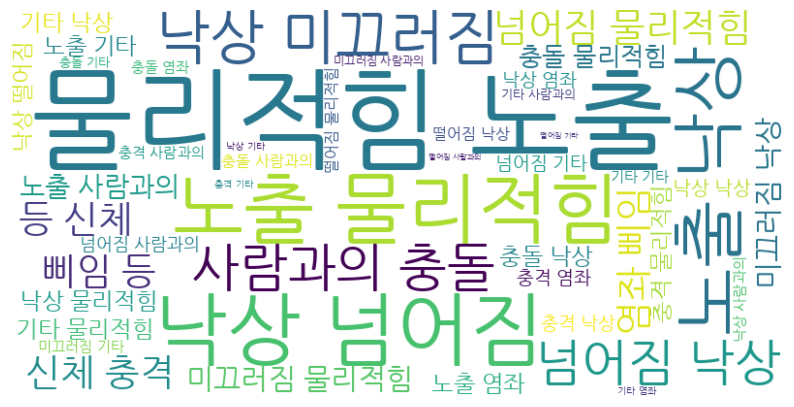

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 한글 폰트 설정
font_path = '/mnt/data/NanumGothic.ttf'  # 업로드한 파일 경로

# 텍스트 데이터 생성
text = ' '.join(df['사고형태'].dropna())

# 워드클라우드 생성
wordcloud = WordCloud(font_path=font_path, width=800, height=400, background_color='white').generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


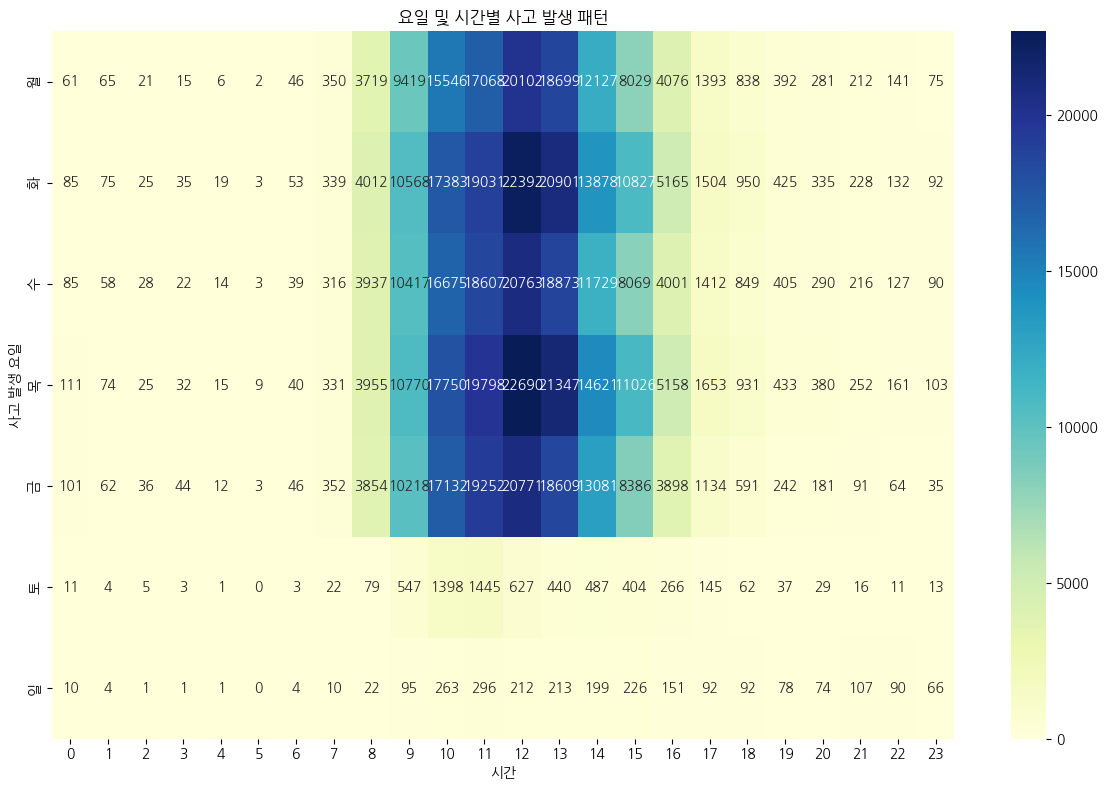

In [87]:
# 사고발생요일 열을 요일 데이터로 변환
df['사고발생요일'] = pd.Categorical(df['사고발생요일'], categories=['월', '화', '수', '목', '금', '토', '일'], ordered=True)

# 시간별 사고 발생 건수 집계
heatmap_data = df.groupby(['사고발생요일', '시간']).size().unstack().fillna(0)

# 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('요일 및 시간별 사고 발생 패턴')
plt.xlabel('시간')
plt.ylabel('사고 발생 요일')
plt.tight_layout()
plt.show()

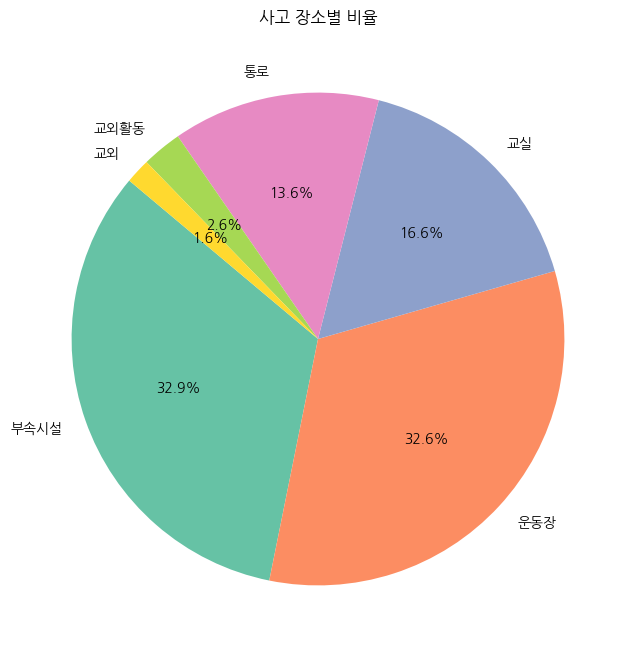

In [88]:
# 파이 차트 시각화
place_counts = df['사고장소'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(place_counts, labels=place_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2", len(place_counts)))
plt.title('사고 장소별 비율')
plt.show()


#사고장소별 사고 발생 건수 시각화

<ipython-input-89-22a9b78d9bef>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='사고장소', palette='viridis')


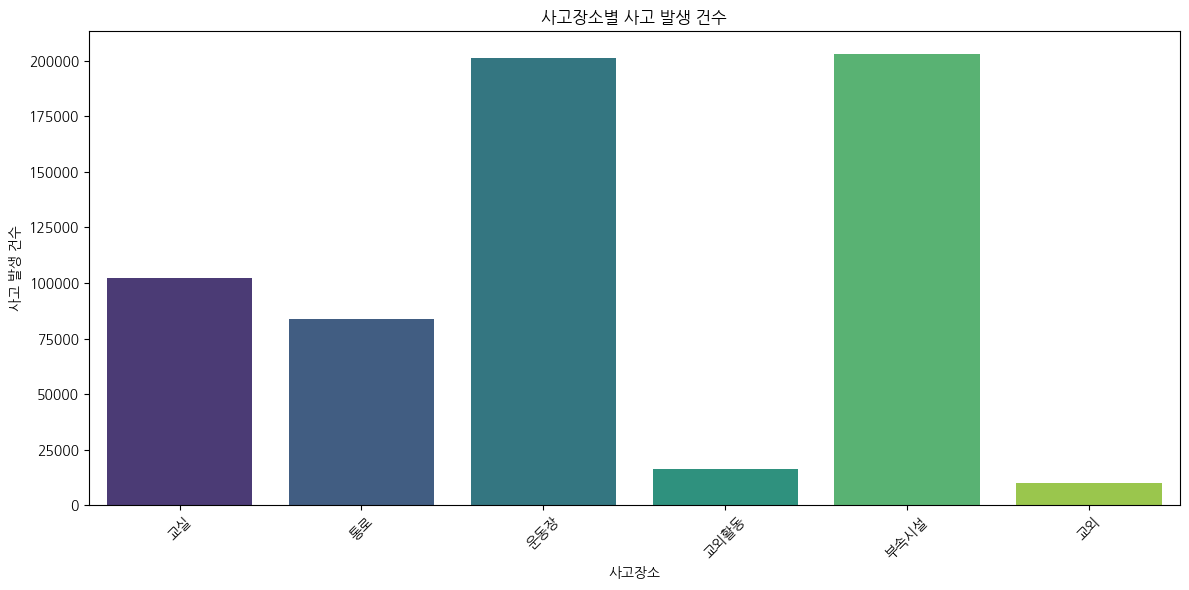

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='사고장소', palette='viridis')
plt.title('사고장소별 사고 발생 건수')
plt.xlabel('사고장소')
plt.ylabel('사고 발생 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 사고장소별 사고 발생 건수

<ipython-input-90-9427963f1763>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='사고장소', palette='viridis', order=df['사고장소'].value_counts().index)


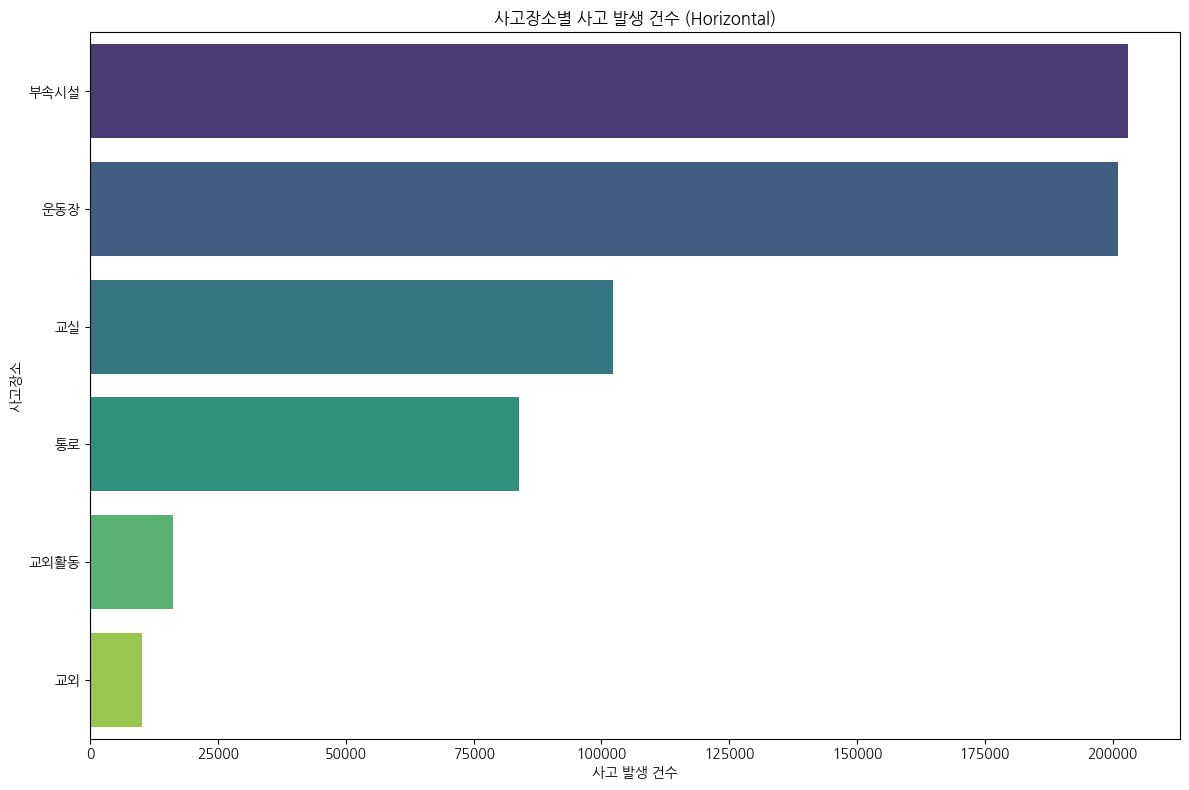

In [90]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, y='사고장소', palette='viridis', order=df['사고장소'].value_counts().index)
plt.title('사고장소별 사고 발생 건수 (Horizontal)')
plt.xlabel('사고 발생 건수')
plt.ylabel('사고장소')
plt.tight_layout()
plt.show()


<ipython-input-91-28674c2b3129>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['사고장소'].isin(top_locations)], x='사고장소', palette='viridis')


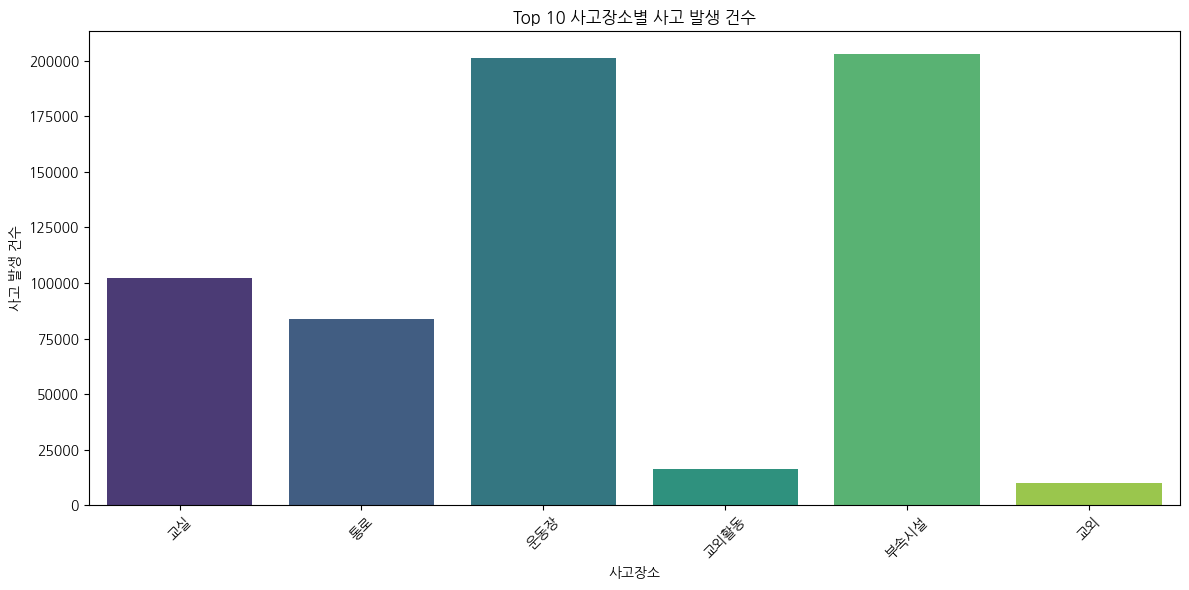

In [91]:
top_n = 10
top_locations = df['사고장소'].value_counts().head(top_n).index

plt.figure(figsize=(12, 6))
sns.countplot(data=df[df['사고장소'].isin(top_locations)], x='사고장소', palette='viridis')
plt.title(f'Top {top_n} 사고장소별 사고 발생 건수')
plt.xlabel('사고장소')
plt.ylabel('사고 발생 건수')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


>> 원하는 결론 : 사고가 많이 나는 것은 특정한 시설(사고장소) 그러므로 <외부사고 시설> 과 < 내부사고 시설 > 설명?

**도별 사고인원**

In [92]:
# 지역별 사고 현황 분석
region_counts = df['지역'].value_counts()

<ipython-input-93-caa1e9791c69>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')


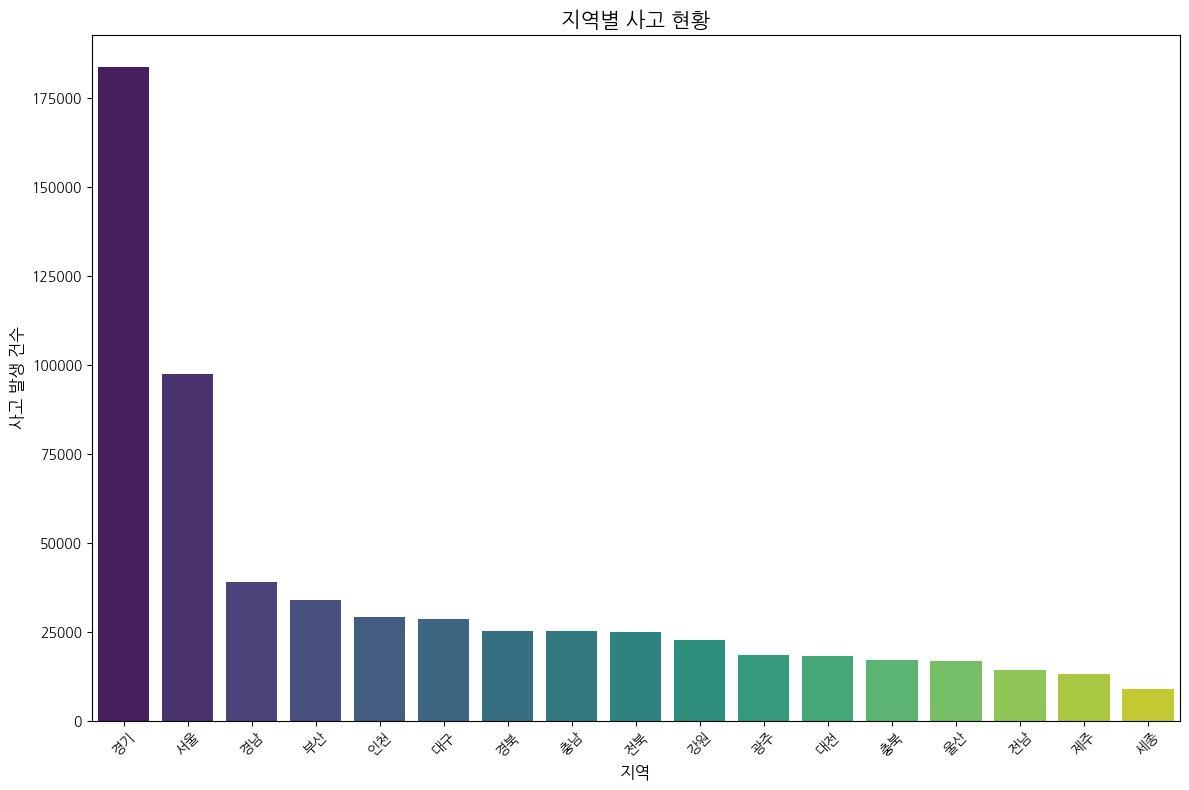

In [93]:
# 지역별 사고 현황 시각화
plt.figure(figsize=(12, 8))
sns.barplot(x=region_counts.index, y=region_counts.values, palette='viridis')
plt.title('지역별 사고 현황', fontsize=15)
plt.xlabel('지역', fontsize=12)
plt.ylabel('사고 발생 건수', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [94]:
# 도별 초중고 개수 분석
school_counts = df.groupby(['지역', '학교급']).size().unstack(fill_value=0)

In [101]:
# 각 도별 학교 수 카운트
school_counts_sum = school_counts.sum(axis=1)

<Figure size 1200x800 with 0 Axes>

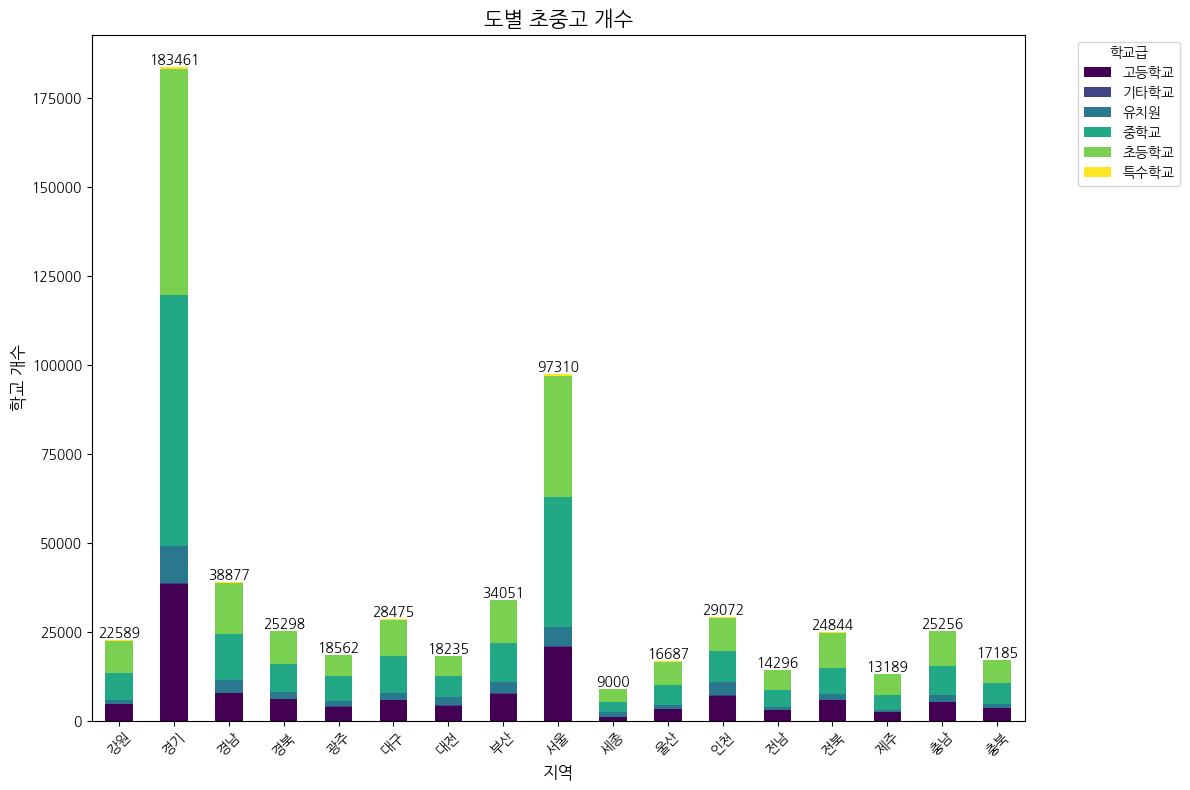

In [96]:
# 도별 초중고 개수 시각화
plt.figure(figsize=(12, 8))
school_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
for idx, count in enumerate(school_counts_sum):
    plt.text(idx, count, str(count), ha='center', va='bottom')
plt.title('도별 초중고 개수', fontsize=15)
plt.xlabel('지역', fontsize=12)
plt.ylabel('학교 개수', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='학교급', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [99]:
df = df[df['연도'].between(2019, 2023)]
years = df['연도'].unique()
for year in years:
    df_year = df[df['연도'] == year]
    school_counts = df_year.groupby(['지역', '학교급']).size().unstack(fill_value=0)
    school_counts_sum = school_counts.sum(axis=1)

    plt.figure(figsize=(12, 8))
    school_counts.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
    for idx, count in enumerate(school_counts_sum):
        plt.text(idx, count, str(count), ha='center', va='bottom')
    plt.title(f'{year}년 도별 초중고 개수', fontsize=15)
    plt.xlabel('지역', fontsize=12)
    plt.ylabel('학교 개수', fontsize=12)
    plt.xticks(rotation=45)
    plt.legend(title='학교급', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

KeyError: '연도'

<ipython-input-113-75a6ff51afe0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')


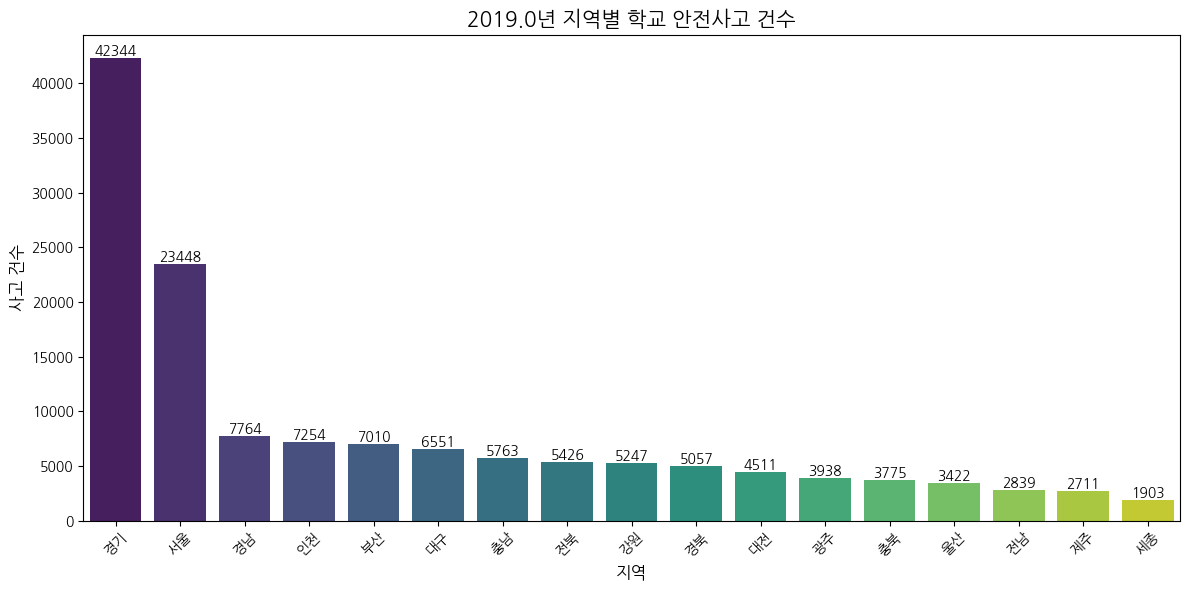

<ipython-input-113-75a6ff51afe0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')


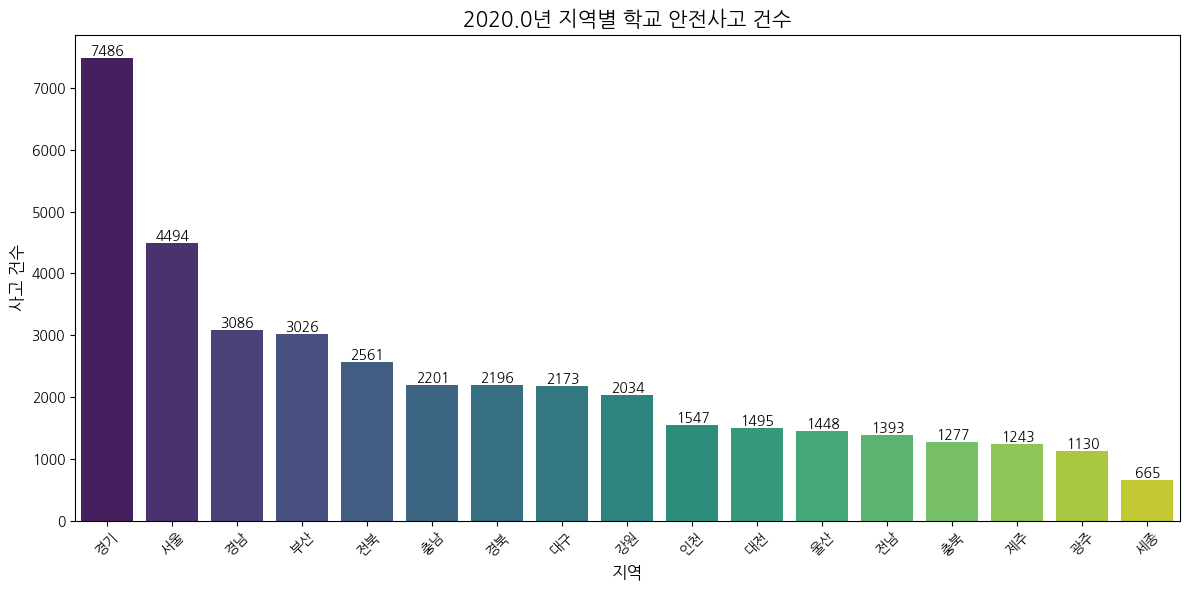

<ipython-input-113-75a6ff51afe0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')


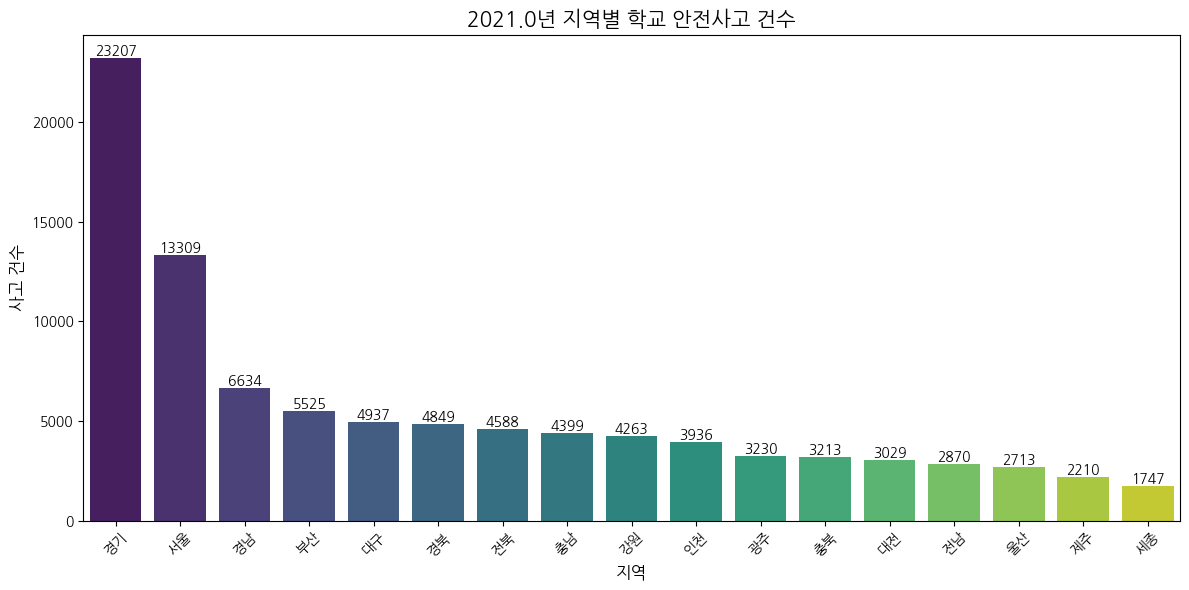

<ipython-input-113-75a6ff51afe0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')


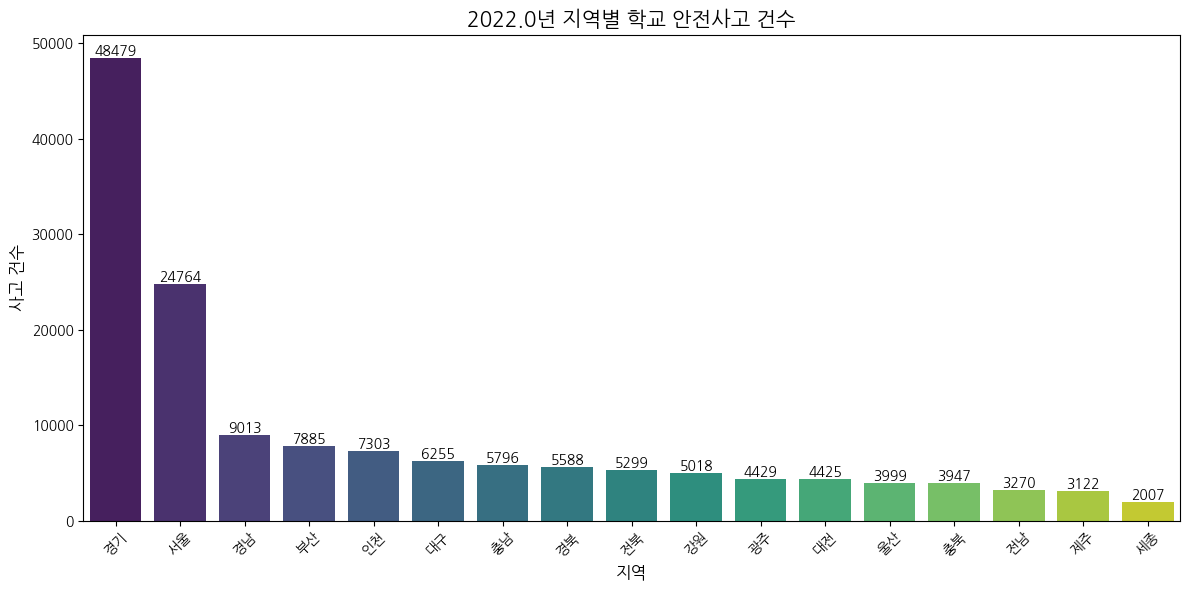

<ipython-input-113-75a6ff51afe0>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')


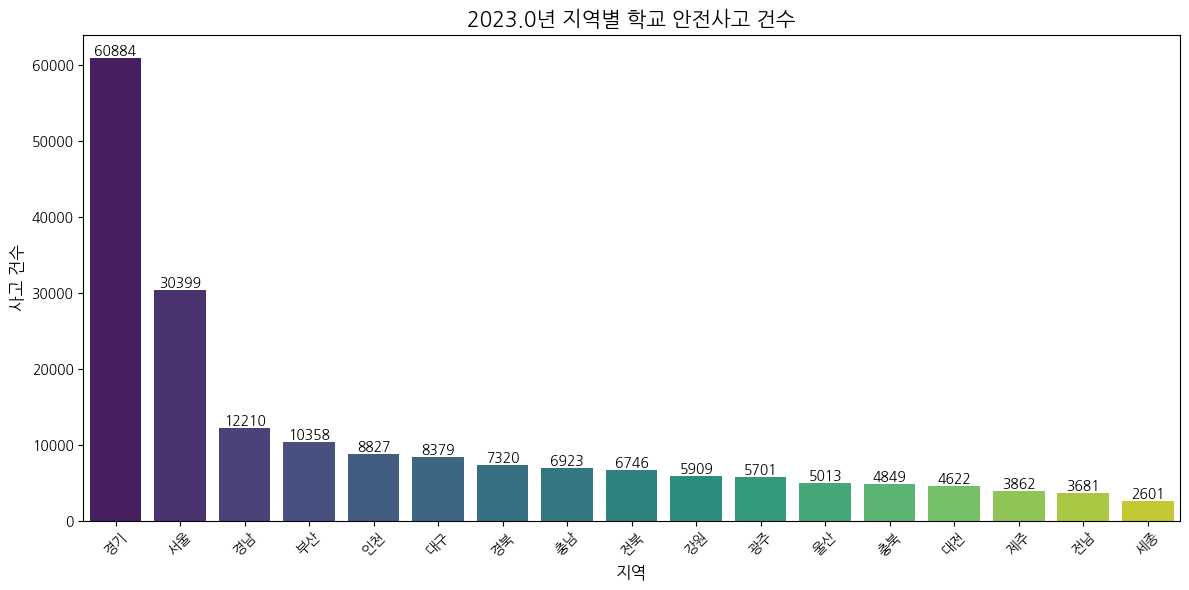

In [113]:
# 파일 경로
file_path = '/content/★2019~2023 학교안전사고 데이터_수정.xlsx'

# 엑셀 파일의 모든 시트 읽기
df = pd.read_excel(file_path, sheet_name=None)

# 각 시트를 합치기
data = pd.concat(df.values())

# 연도 열을 추출하여 추가
data['연도'] = pd.DatetimeIndex(data['사고발생일']).year

# 2019년부터 2023년까지 데이터 필터링
data = data[data['연도'].between(2019, 2023)]

# 연도별 데이터 프레임 분리
years = data['연도'].unique()
data_dict = {year: data[data['연도'] == year] for year in years}

# 연도별 데이터 그룹화 및 시각화
for year, df in data_dict.items():
    # 지역별 사고 건수 계산
    accident_counts = df.groupby('지역').size().sort_values(ascending=False)

    plt.figure(figsize=(12, 6))
    sns.barplot(x=accident_counts.index, y=accident_counts.values, palette='viridis')
    plt.title(f'{year}년 지역별 학교 안전사고 건수', fontsize=15)
    plt.xlabel('지역', fontsize=12)
    plt.ylabel('사고 건수', fontsize=12)
    plt.xticks(rotation=45)

    # 막대 그래프 위에 사고 건수 표시
    for i, count in enumerate(accident_counts.values):
        plt.text(i, count, str(count), ha='center', va='bottom', fontsize=10, fontproperties=fontprop)

    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

NameError: name 'fontprop' is not defined

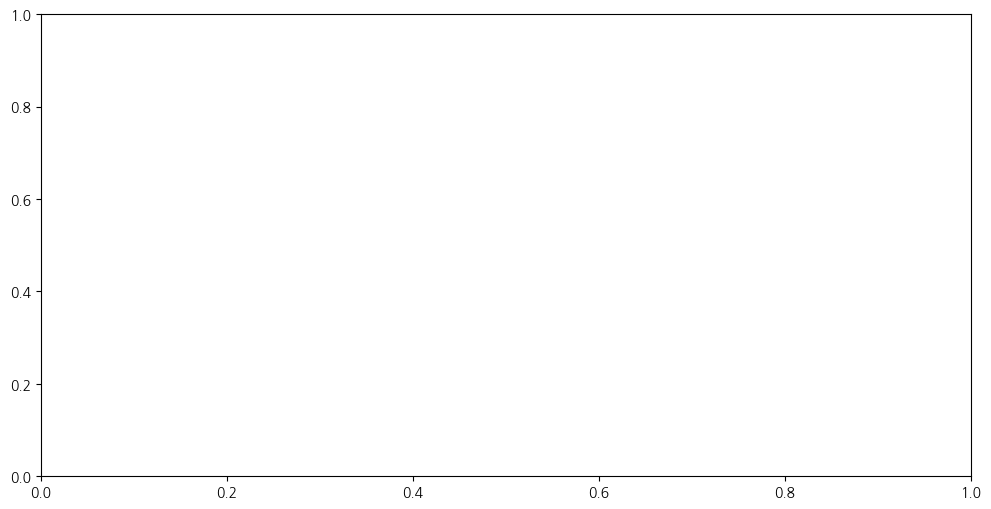

In [102]:
# 연도별 파일 경로
file_paths = {
    2019: '/content/2019_시설 현황.xlsx',
    2020: '/content/2020_시설 현황.xlsx',
    2021: '/content/2021_시설 현황.xlsx',
    2022: '/content/2022_시설 현황 (1).xlsx',
    2023: '/content/2023_시설 현황.xlsx'
}

# 데이터를 저장할 딕셔너리
data = {}

# 각 파일을 로드하여 데이터프레임에 저장
for year, path in file_paths.items():
    df = pd.read_excel(path)
    drop_indices = [211, 213, 214, 215, 217, 218, 219]
    existing_indices = [idx for idx in drop_indices if idx in df.index]
    df = df.drop(index=existing_indices)
    filter_strings = ['시도','소계','각종학교','(일반고)','(특목고)','(특성화고)','(자율고)','조사기준일', '출처', '단위', '학생 수', '시도', '1. 학생 1인당 교지면적 = 교지면적 / 학생수', '2. 학생 1인당 건물면적 = 건물면적 / 학생수','산출식' ]
    for filter_str in filter_strings:
      df = df[~df.astype(str).apply(lambda x: x.str.contains(filter_str, na=False)).any(axis=1)]
    data[year] = df

# 각 연도별로 지역별 1인 교지면적과 건물면적 계산
for year, df in data.items():
    df = df[['시도', '학생 1인당 교지면적', '학생 1인당 건물면적']]
    df['학생 1인당 교지면적'] = pd.to_numeric(df['학생 1인당 교지면적'], errors='coerce')
    df['학생 1인당 건물면적'] = pd.to_numeric(df['학생 1인당 건물면적'], errors='coerce')
    df_grouped = df.groupby('시도').agg({
        '학생 1인당 교지면적': 'mean',
        '학생 1인당 건물면적': 'mean'
    }).reset_index()

    df_grouped = df_grouped.sort_values(by=['학생 1인당 교지면적', '학생 1인당 건물면적'])
    # 시각화
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_grouped, x='시도', y='학생 1인당 교지면적', palette='viridis')
    plt.title(f'{year}년 지역별 1인 교지면적', fontsize=15)
    plt.xlabel('지역', fontsize=12)
    plt.ylabel('1인 교지면적 (m²)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    df_grouped = df_grouped.sort_values(by='학생 1인당 건물면적')
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_grouped, x='시도', y='학생 1인당 건물면적', palette='viridis')
    plt.title(f'{year}년 지역별 1인 건물면적', fontsize=15)
    plt.xlabel('지역', fontsize=12)
    plt.ylabel('1인 건물면적 (m²)', fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")
/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default sty

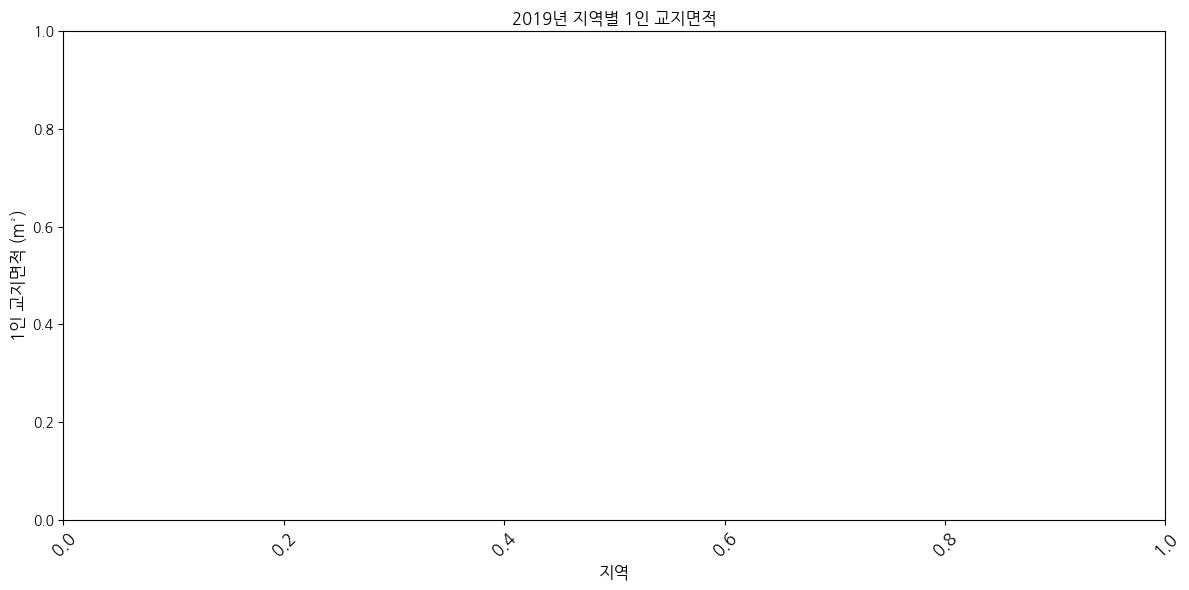

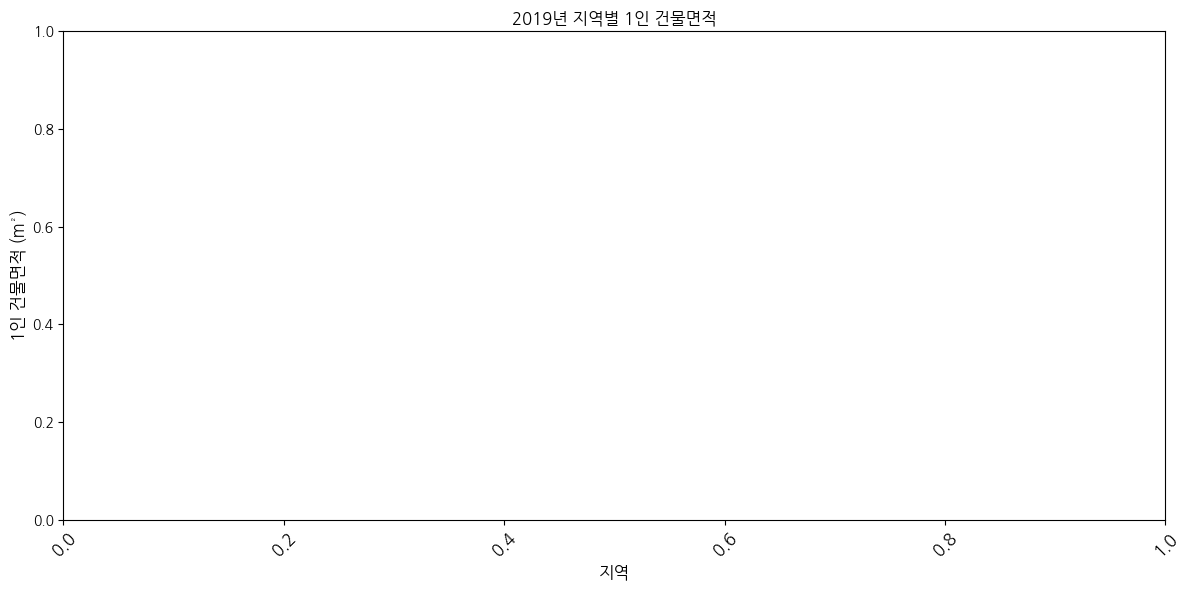

<ipython-input-109-644f84ff1ab1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학생 1인당 교지면적'] = pd.to_numeric(df['학생 1인당 교지면적'], errors='coerce')
<ipython-input-109-644f84ff1ab1>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학생 1인당 건물면적'] = pd.to_numeric(df['학생 1인당 건물면적'], errors='coerce')
<ipython-input-109-644f84ff1ab1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

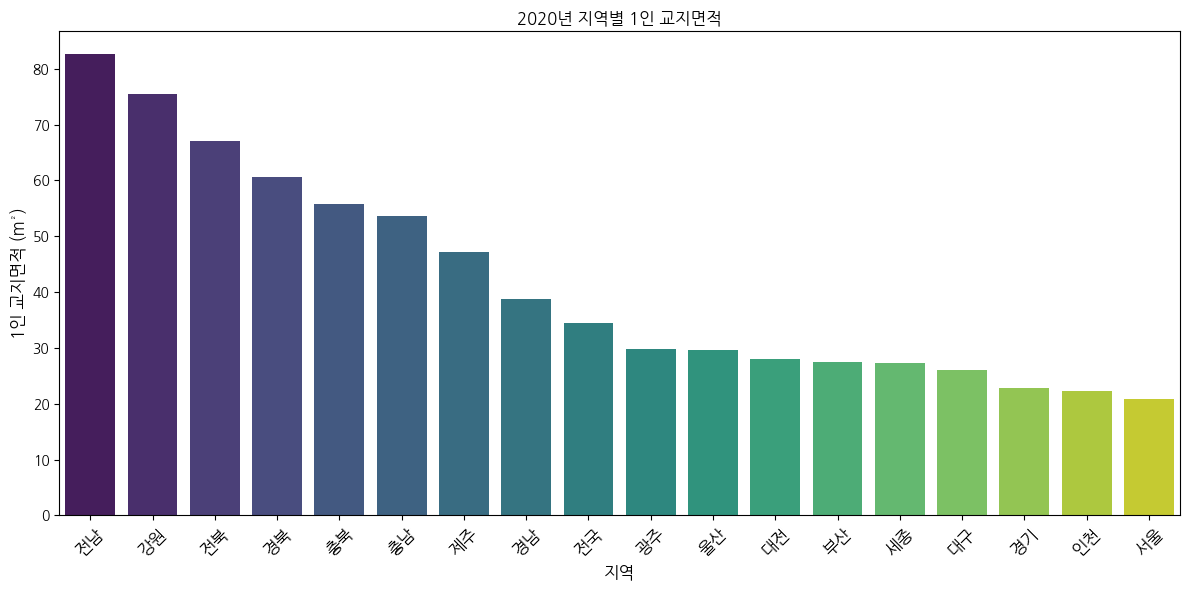

<ipython-input-109-644f84ff1ab1>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='시도', y='학생 1인당 건물면적', palette='viridis')


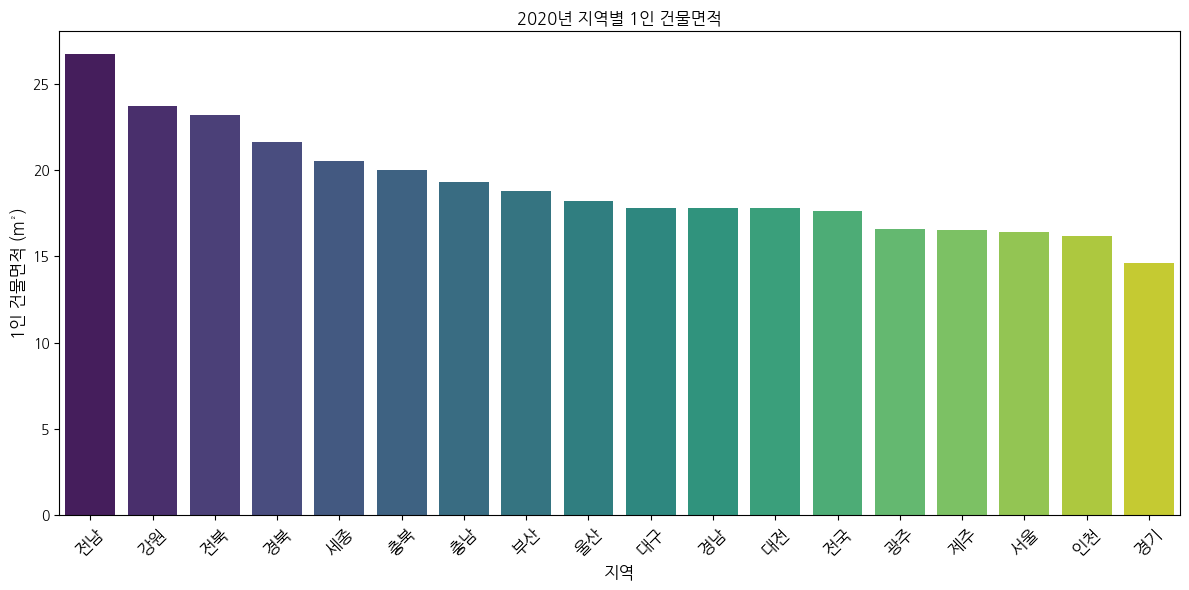

<ipython-input-109-644f84ff1ab1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학생 1인당 교지면적'] = pd.to_numeric(df['학생 1인당 교지면적'], errors='coerce')
<ipython-input-109-644f84ff1ab1>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학생 1인당 건물면적'] = pd.to_numeric(df['학생 1인당 건물면적'], errors='coerce')
<ipython-input-109-644f84ff1ab1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

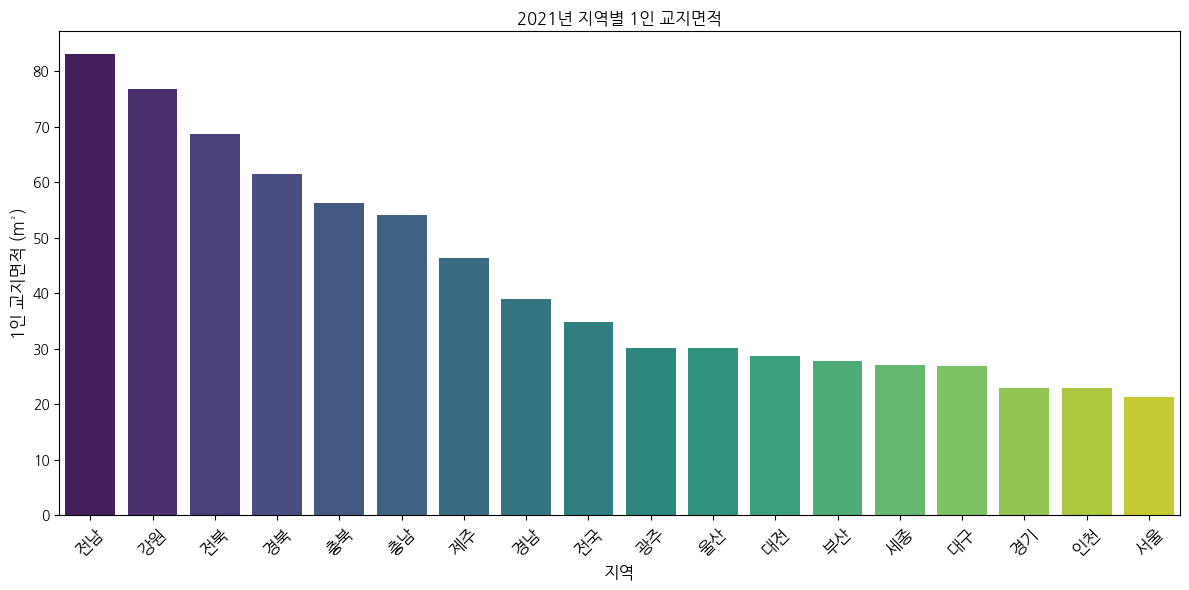

<ipython-input-109-644f84ff1ab1>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='시도', y='학생 1인당 건물면적', palette='viridis')


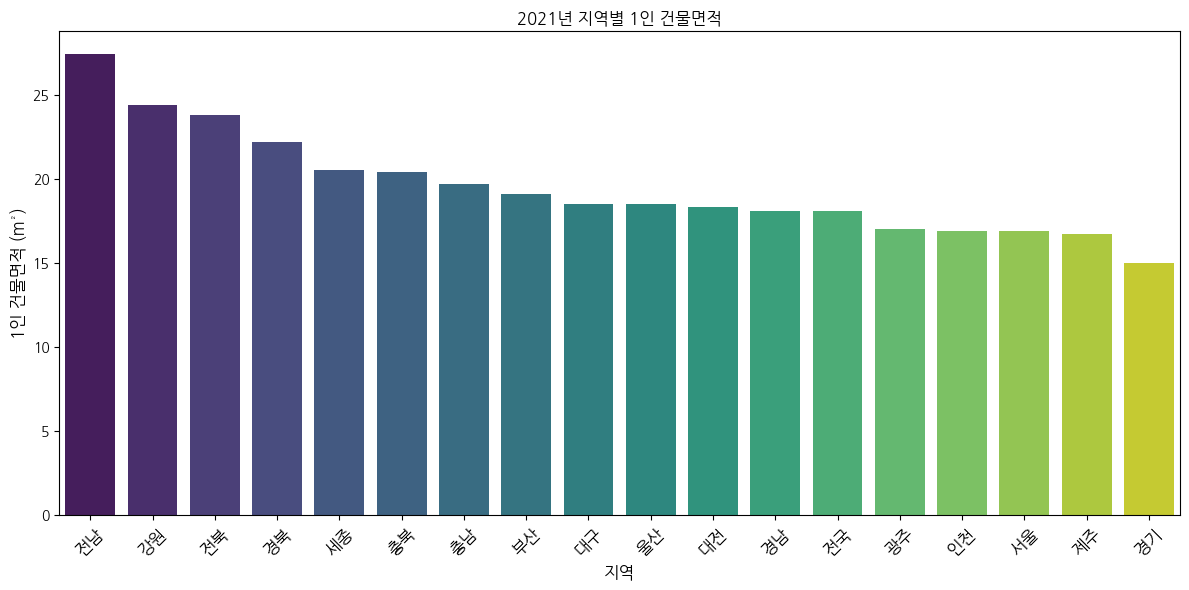

<ipython-input-109-644f84ff1ab1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학생 1인당 교지면적'] = pd.to_numeric(df['학생 1인당 교지면적'], errors='coerce')
<ipython-input-109-644f84ff1ab1>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학생 1인당 건물면적'] = pd.to_numeric(df['학생 1인당 건물면적'], errors='coerce')
<ipython-input-109-644f84ff1ab1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

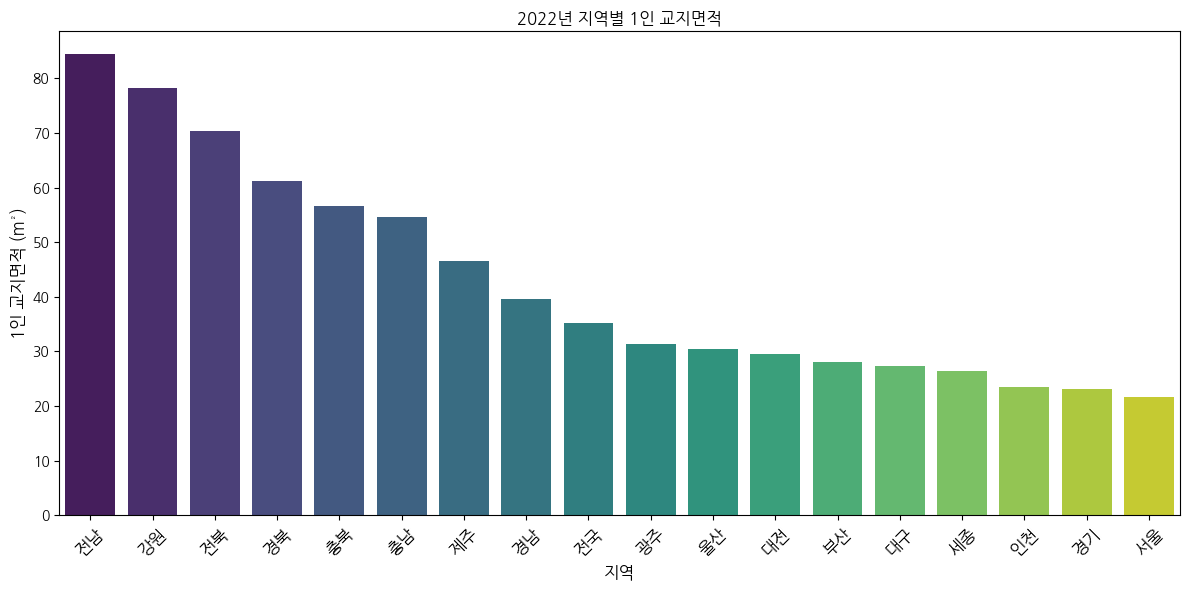

<ipython-input-109-644f84ff1ab1>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='시도', y='학생 1인당 건물면적', palette='viridis')


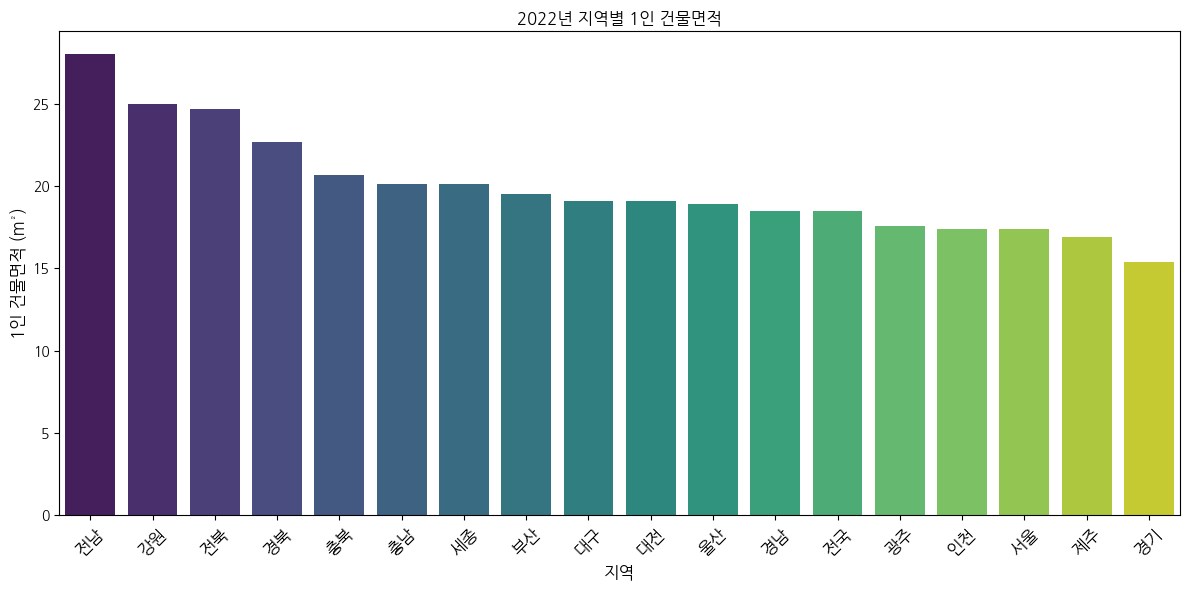

<ipython-input-109-644f84ff1ab1>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학생 1인당 교지면적'] = pd.to_numeric(df['학생 1인당 교지면적'], errors='coerce')
<ipython-input-109-644f84ff1ab1>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['학생 1인당 건물면적'] = pd.to_numeric(df['학생 1인당 건물면적'], errors='coerce')
<ipython-input-109-644f84ff1ab1>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the 

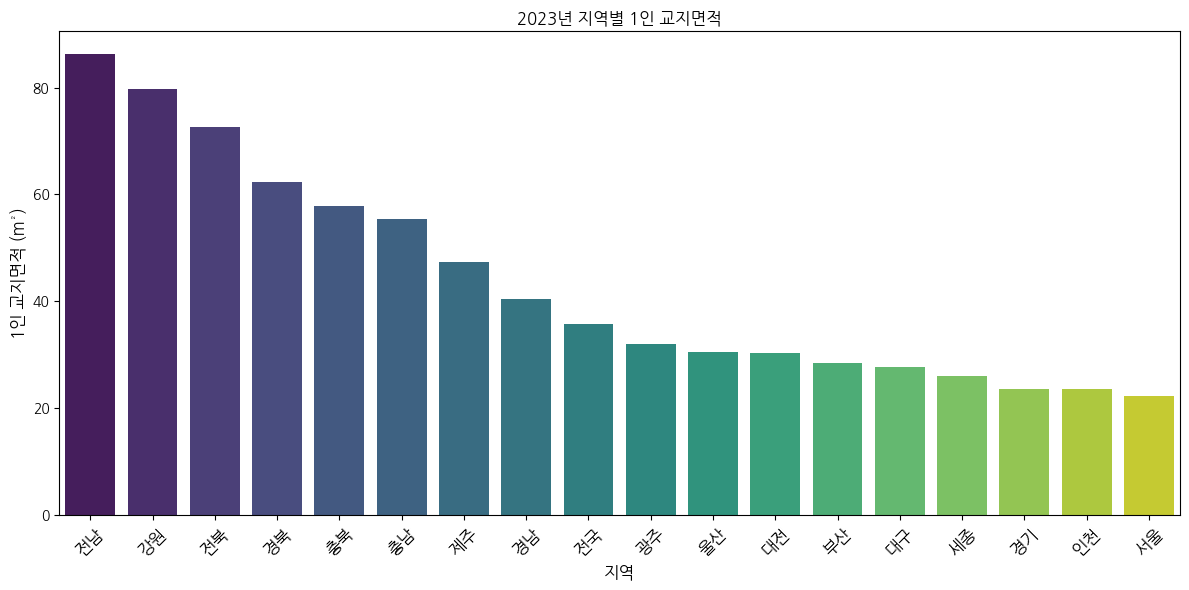

<ipython-input-109-644f84ff1ab1>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_grouped, x='시도', y='학생 1인당 건물면적', palette='viridis')


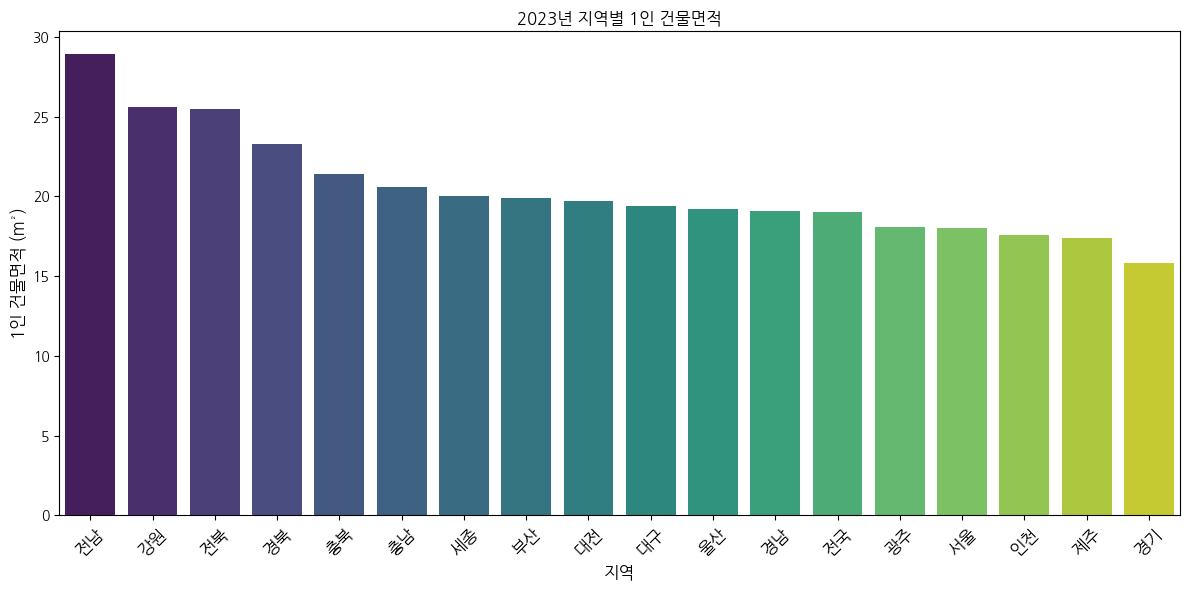

In [109]:
import matplotlib.font_manager as fm

font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=fontprop.get_name())

# 연도별 파일 경로
file_paths = {
    2019: '/content/2019_시설 현황.xlsx',
    2020: '/content/2020_시설 현황.xlsx',
    2021: '/content/2021_시설 현황.xlsx',
    2022: '/content/2022_시설 현황 (1).xlsx',
    2023: '/content/2023_시설 현황.xlsx'
}

# 데이터를 저장할 딕셔너리
data = {}

# 각 파일을 로드하여 데이터프레임에 저장
for year, path in file_paths.items():
    df = pd.read_excel(path)
    # 소계값만 필터링
    df = df[df['학제'] == '소계']
    data[year] = df

# 각 연도별로 지역별 1인 교지면적과 건물면적 계산 및 시각화
for year, df in data.items():
    df = df[['시도', '학생 1인당 교지면적', '학생 1인당 건물면적']]
    df['학생 1인당 교지면적'] = pd.to_numeric(df['학생 1인당 교지면적'], errors='coerce')
    df['학생 1인당 건물면적'] = pd.to_numeric(df['학생 1인당 건물면적'], errors='coerce')

    df_grouped = df.groupby('시도').mean().reset_index()

    # 1인당 교지면적 내림차순 정렬
    df_grouped = df_grouped.sort_values(by='학생 1인당 교지면적', ascending=False)

    # 시각화: 학생 1인당 교지면적
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_grouped, x='시도', y='학생 1인당 교지면적', palette='viridis')
    plt.title(f'{year}년 지역별 1인 교지면적', fontsize=15, fontproperties=fontprop)
    plt.xlabel('지역', fontsize=12, fontproperties=fontprop)
    plt.ylabel('1인 교지면적 (m²)', fontsize=12, fontproperties=fontprop)
    plt.xticks(rotation=45, fontproperties=fontprop)
    plt.tight_layout()
    plt.show()

    # 1인당 건물면적 내림차순 정렬
    df_grouped = df_grouped.sort_values(by='학생 1인당 건물면적', ascending=False)

    # 시각화: 학생 1인당 건물면적
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_grouped, x='시도', y='학생 1인당 건물면적', palette='viridis')
    plt.title(f'{year}년 지역별 1인 건물면적', fontsize=15, fontproperties=fontprop)
    plt.xlabel('지역', fontsize=12, fontproperties=fontprop)
    plt.ylabel('1인 건물면적 (m²)', fontsize=12, fontproperties=fontprop)
    plt.xticks(rotation=45, fontproperties=fontprop)
    plt.tight_layout()
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')